In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [30]:
with open("../data/raw/marketing_campaign.csv", "r") as f:
    for _ in range(5):
        print(f.readline())

ID;Year_Birth;Education;Marital_Status;Income;Kidhome;Teenhome;Dt_Customer;Recency;MntWines;MntFruits;MntMeatProducts;MntFishProducts;MntSweetProducts;MntGoldProds;NumDealsPurchases;NumWebPurchases;NumCatalogPurchases;NumStorePurchases;NumWebVisitsMonth;AcceptedCmp3;AcceptedCmp4;AcceptedCmp5;AcceptedCmp1;AcceptedCmp2;Complain;Z_CostContact;Z_Revenue;Response

5524;1957;Graduation;Single;58138;0;0;2012-09-04;58;635;88;546;172;88;88;3;8;10;4;7;0;0;0;0;0;0;3;11;1

2174;1954;Graduation;Single;46344;1;1;2014-03-08;38;11;1;6;2;1;6;2;1;1;2;5;0;0;0;0;0;0;3;11;0

4141;1965;Graduation;Together;71613;0;0;2013-08-21;26;426;49;127;111;21;42;1;8;2;10;4;0;0;0;0;0;0;3;11;0

6182;1984;Graduation;Together;26646;1;0;2014-02-10;26;11;4;20;10;3;5;2;2;0;4;6;0;0;0;0;0;0;3;11;0



In [32]:
markt_analytics = pd.read_csv("../data/raw/marketing_campaign.csv", sep=';')  # NOTE: Kaggle CSV is tab-separated ( sep='\t') or semicolon (;)
print("Shape:", markt_analytics.shape)

Shape: (2240, 29)


In [33]:
markt_analytics.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [34]:
markt_analytics.columns.tolist()

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [35]:
markt_analytics.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [36]:
markt_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [37]:
markt_analytics.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,2012-08-31,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [38]:
markt_analytics.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

Out of 2,240 total rows, 24 rows have a missing value (i.e., NaN) in the Income column.

In [39]:
markt_analytics['Total_Kids'] = markt_analytics['Kidhome'] + markt_analytics['Teenhome']

In [42]:
markt_analytics['Dt_Customer'] = pd.to_datetime(markt_analytics['Dt_Customer'])
reference_date = pd.to_datetime("2025-01-01")
markt_analytics['Customer_Duration'] = (reference_date - markt_analytics['Dt_Customer']).dt.days

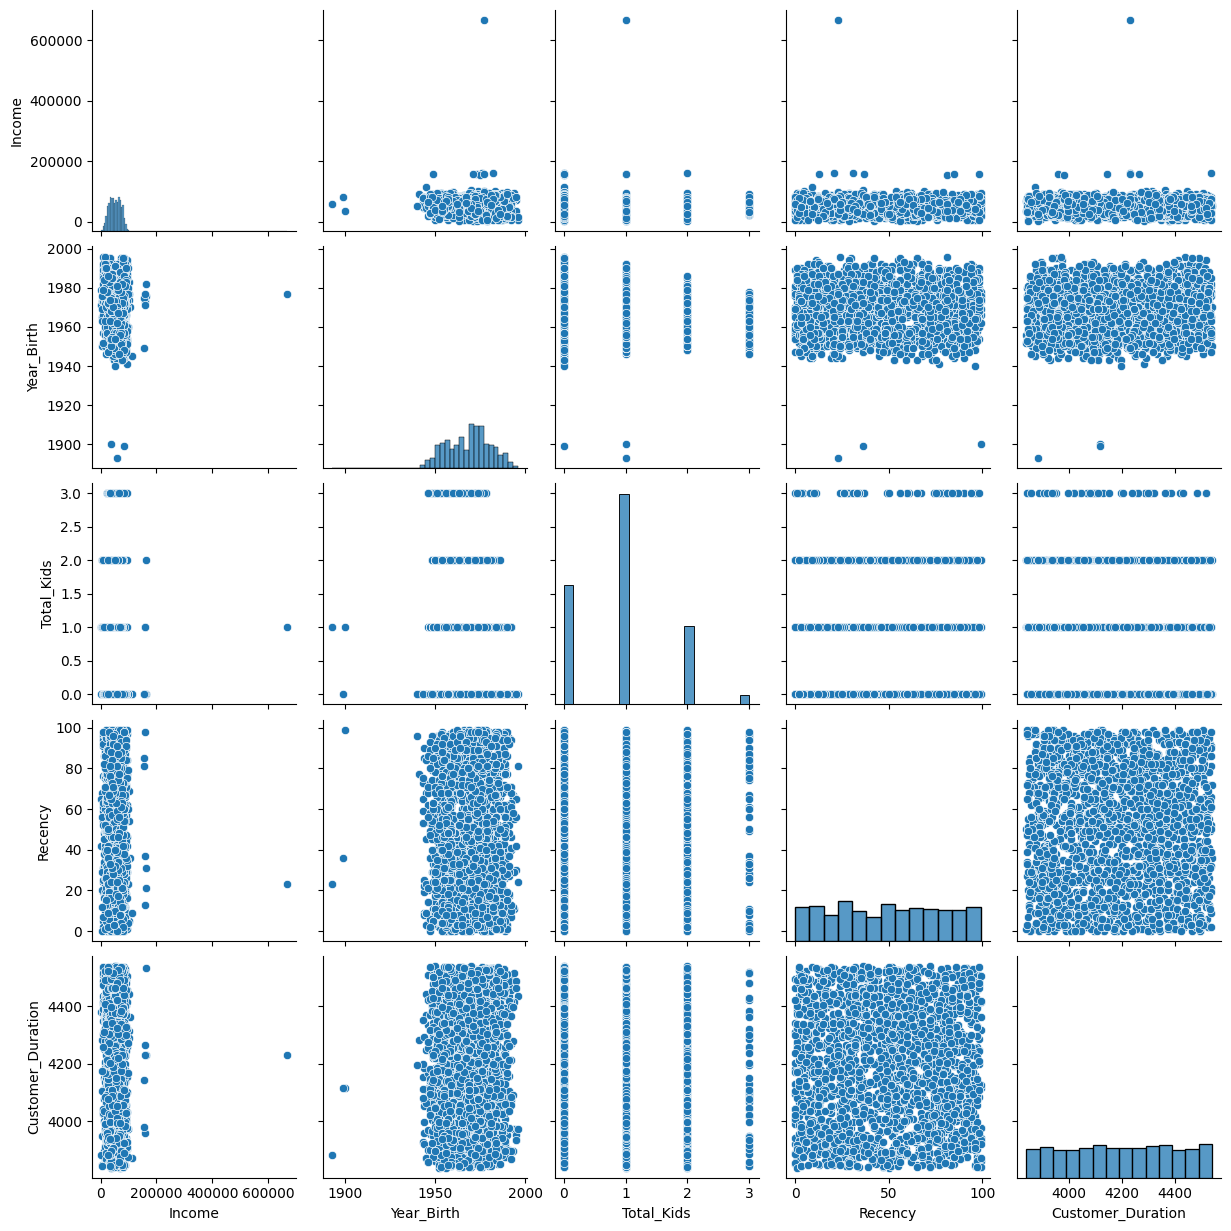

In [43]:
numeric_cols = ['Income', 'Year_Birth', 'Total_Kids', 'Recency', 'Customer_Duration']
sns.pairplot(markt_analytics[numeric_cols])

In [44]:
# correlation matrix
markt_analytics.corr(numeric_only=True)['Income'].sort_values(ascending=False)

Income                 1.000000
NumCatalogPurchases    0.589162
MntMeatProducts        0.584633
MntWines               0.578650
NumStorePurchases      0.529362
MntSweetProducts       0.440744
MntFishProducts        0.438871
MntFruits              0.430842
NumWebPurchases        0.387878
AcceptedCmp5           0.335943
MntGoldProds           0.325916
AcceptedCmp1           0.276820
AcceptedCmp4           0.184400
Response               0.133047
AcceptedCmp2           0.087545
Teenhome               0.019133
ID                     0.013095
Recency               -0.003970
AcceptedCmp3          -0.016174
Customer_Duration     -0.018531
Complain              -0.027225
NumDealsPurchases     -0.083101
Year_Birth            -0.161791
Total_Kids            -0.293352
Kidhome               -0.428669
NumWebVisitsMonth     -0.553088
Z_CostContact               NaN
Z_Revenue                   NaN
Name: Income, dtype: float64

Income positively correlates with spending (MntMeatProducts, NumStorePurchases, etc.)

Total_Kids and NumWebVisitsMonth are negatively correlated with Income

Customer_Duration has little effect on Income

In [45]:
#group Education, Marital Status to see income averages
markt_analytics.groupby(['Education', 'Marital_Status'])['Income'].mean().sort_values()


Education   Marital_Status
Basic       Divorced           9548.000000
            Single            18238.666667
            Together          21240.071429
            Married           21960.500000
            Widow             22123.000000
Graduation  Alone             34176.000000
PhD         Alone             35860.000000
2n Cycle    Together          44736.410714
            Married           46201.100000
PhD         YOLO              48432.000000
2n Cycle    Divorced          49395.130435
Master      Divorced          50331.945946
Graduation  Married           50800.258741
            Single            51322.182927
2n Cycle    Widow             51392.200000
Master      Together          52109.009804
PhD         Divorced          53096.615385
Master      Married           53286.028986
PhD         Single            53314.614583
Master      Single            53530.560000
2n Cycle    Single            53673.944444
Graduation  Divorced          54526.042017
            Widow          

Higher education = Higher income

Categories like "PhD + Married" or "Master + Absurd" have the highest average incomes

In [46]:
#missing value patterns
markt_analytics[markt_analytics['Income'].isnull()][['Education', 'Marital_Status']].value_counts()


Education   Marital_Status
Graduation  Single            6
            Married           4
Master      Together          4
PhD         Married           2
            Single            2
2n Cycle    Married           1
            Single            1
            Together          1
Graduation  Together          1
Master      Widow             1
PhD         Together          1
Name: count, dtype: int64

24 missing Income values are spread across known Education + Marital_Status groups, with group sizes like:

- Graduation + Single: 6 missing

- Master + Together: 4 missing

- PhD + Married: 2 missing and so on...

Each group has enough samples (≥1) to compute a group-specific mean. This makes group-based imputation statistically safe.

In [47]:
markt_analytics['Income'] = markt_analytics.groupby(['Education', 'Marital_Status'])['Income']\
    .transform(lambda x: x.fillna(x.mean()))
print (markt_analytics['Income'].isnull().sum())

0


In [27]:
os.makedirs("../data/processed", exist_ok=True)
markt_analytics.to_csv("../data/processed/marketing_campaign_cleaned.csv", index=False)